In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft
import os

PATH = os.getcwd() + '/'
PATH

'/home/andre/Documents/Git/ColetaPressao/ColetaPressao/test/analysis/'

100.0


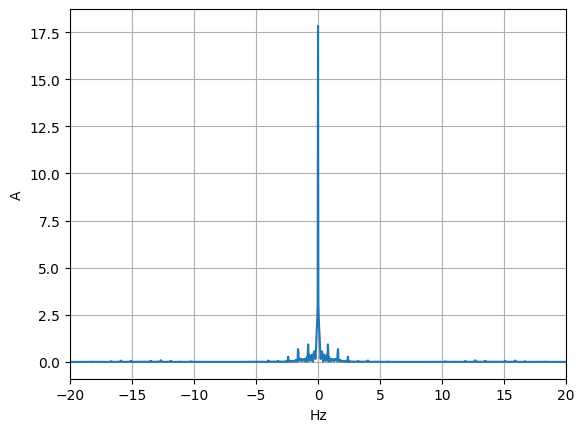

In [49]:
Ts = 1/100
Fs = 1/Ts
print(Fs)

txt = 'data_bancada_transiente.txt'

data = np.loadtxt(PATH + txt)

data_fft = fft.fftshift(fft.fft(data))
freqs = np.fft.fftshift(np.fft.fftfreq(len(data_fft), 1/Fs))

plt.plot(freqs, np.abs(data_fft) / len(data_fft))

plt.grid()
plt.xlabel("Hz")
plt.ylabel('A')
plt.xlim(-20 ,20)

plt.show()

Coeficientes do Filtro FIR:
[0.00219905 0.01735971 0.07367287 0.16623859 0.24052979 0.24052979
 0.16623859 0.07367287 0.01735971 0.00219905]


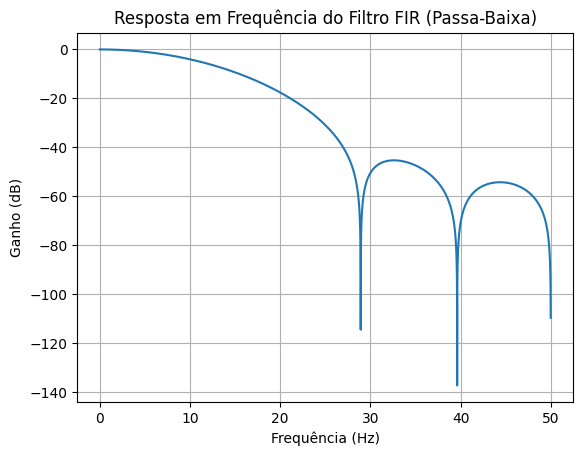

In [50]:
# Especificações do filtro
fs = Fs          # Taxa de amostragem em Hz
fc = 10            # Frequência de corte em Hz
num_taps = 10     # Número de coeficientes (taps)

# Gerar os coeficientes do filtro FIR
coefficients = signal.firwin(num_taps, fc, fs=fs,window = 'hamming', pass_zero='lowpass')

# Exibir os coeficientes
print("Coeficientes do Filtro FIR:")
print(coefficients)

# Visualizar a resposta em frequência
w, h = signal.freqz(coefficients, worN=8000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))

plt.title("Resposta em Frequência do Filtro FIR (Passa-Baixa)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Ganho (dB)")
plt.grid()

plt.show()

media: 17.83077380952381
Pico de leitura: 26.17 KPa


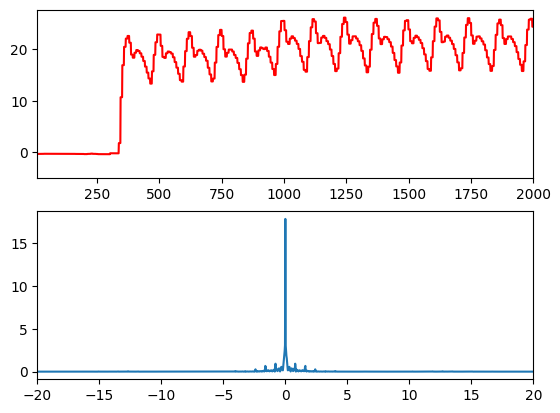

In [54]:
data_filter = signal.lfilter(coefficients, 1, data)

xfft = fft.fftshift(fft.fft(data_filter))

freqs = np.fft.fftshift(np.fft.fftfreq(len(xfft), 1/fs))

print(f'media: {np.mean(data)}')
print(f'Pico de leitura: {np.max(data)} KPa')

plt.subplot(211)
plt.plot(data, color='red')
# plt.plot(data_filter)
plt.xlim(10, 2000)

plt.subplot(212)
plt.plot(freqs, np.abs(xfft) / len(xfft))
plt.xlim(-20, 20)

plt.show()